In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('job_skills-Copy1.csv')
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [3]:
data.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [4]:
data[data['Minimum Qualifications'].isna()].head(16)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
15,Google,Manufacturing Test Engineer,Hardware Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
72,Google,"Software Engineer, Android Applications, Veril...",Software Engineering,"Cambridge, MA, United States",NaN,NaN,NaN
91,Google,"Analog / Mixed Signal IC Design Engineer, Veri...",Hardware Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
97,Google,"Program Manager, Behavioral Health, Verily Lif...",Program Management,"South San Francisco, CA, United States",NaN,NaN,NaN
98,Google,"Software Engineer, Android Applications, Veril...",Software Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
123,Google,"Manufacturing Engineer, Verily Life Sciences -...",Hardware Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
150,Google,"IC Test Engineer, Verily Life Sciences - South...",Hardware Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
160,Google,"Software Engineer, Verily Life Sciences - Sout...",Software Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
202,Google,"Firmware Engineer, Verily Life Sciences - Sout...",Software Engineering,"South San Francisco, CA, United States",NaN,NaN,NaN
206,Google,"Software Test Engineer, Mobile and Web Applica...",Software Engineering,"Mountain View, CA, United States",NaN,NaN,NaN


In [5]:
threshold=len(data)*0.1
data.dropna(axis=0,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1235 non-null   object
 1   Title                     1235 non-null   object
 2   Category                  1235 non-null   object
 3   Location                  1235 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1235 non-null   object
 6   Preferred Qualifications  1235 non-null   object
dtypes: object(7)
memory usage: 77.2+ KB


In [7]:
data[data['Minimum Qualifications'].isna()].head(16)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications


In [8]:
data.isnull().sum()

Company                     0
Title                       0
Category                    0
Location                    0
Responsibilities            0
Minimum Qualifications      0
Preferred Qualifications    0
dtype: int64

In [9]:
data1=data['Location'].value_counts().head(20)
data1

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          70
London, United Kingdom               62
San Francisco, CA, United States     49
Singapore                            41
Sydney, Australia                    31
Tokyo, Japan                         31
San Bruno, CA, United States         28
Seattle, WA, United States           27
Shanghai, China                      27
Xinyi District, Taiwan               24
München, Germany                     23
Zürich, Switzerland                  22
Paris, France                        20
Austin, TX, United States            17
Boulder, CO, United States           15
Kirkland, WA, United States          14
São Paulo, Brazil                    13
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location,Category'>

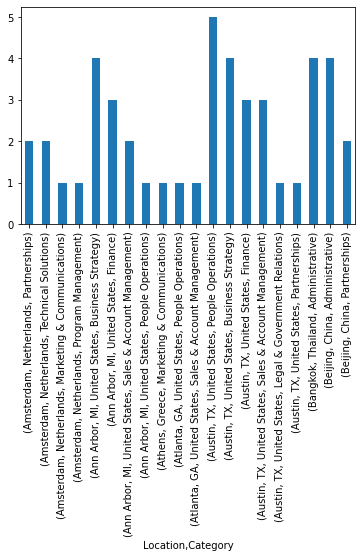

In [10]:
# top 20 job categories and their state
data2 = data.groupby('Location')['Category'].value_counts().head(20)
sns.barplot(kind = 'bar')

In [11]:
data['Location'].value_counts().idxmax()

'Mountain View, CA, United States'

In [12]:
data['Location'].value_counts().idxmin()

'The Dalles, OR, United States'

<AxesSubplot:>

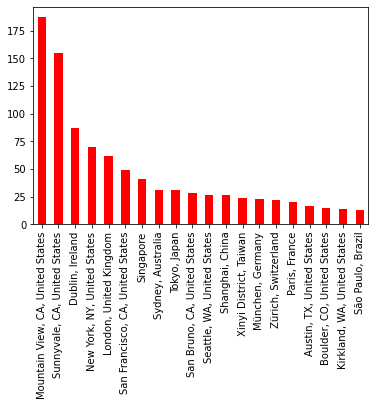

In [13]:
# top 20 Location with highly staffed
data1.plot(kind = 'bar', color = 'r')

<AxesSubplot:xlabel='Company'>

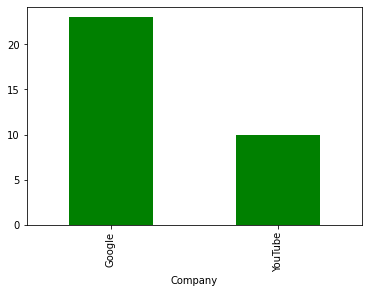

In [14]:
# companies with the number of their job category
data3 = data.groupby('Company')['Category'].nunique().head(20)
data3.plot(kind = 'bar', color = 'g')

In [15]:
# list of infomation related to Nigeria
data[data['Location']=='Nigeria']

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
779,Google,Business Intern 2018,Marketing & Communications,Nigeria,Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver..."


In [16]:
data1.tail()

Paris, France                  20
Austin, TX, United States      17
Boulder, CO, United States     15
Kirkland, WA, United States    14
São Paulo, Brazil              13
Name: Location, dtype: int64

In [19]:
data3 = data[['Location','Category']]

In [20]:
# YouTube info
data5 = data[data['Company']=='YouTube']
data5.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
159,YouTube,"Product Strategist, Growth, YouTube",Business Strategy,"San Bruno, CA, United States",Help define the performance metrics and goals ...,BA/BS degree or equivalent practical experienc...,10 years of experience in an analytically-inte...
309,YouTube,"Performance Video Agency Specialist, YouTube",Sales & Account Management,"New York, NY, United States",Manage Performance relationships from C-level ...,BA/BS degree or equivalent practical experienc...,Established experience relationships and prese...
326,YouTube,"Quality Program Manager, Global Vendor Operati...",Product & Customer Support,"Hyderabad, India","Build a global quality assurance program, driv...",BA/BS degree or equivalent practical experienc...,Strong project management skills (e.g. ability...
421,YouTube,"Online Partner Manager (MENA), YouTube",Partnerships,"London, United Kingdom",Manage and help grow a portfolio of YouTube cr...,BA/BS degree or equivalent practical experienc...,"Experience in the video, media, and/or enterta..."
466,YouTube,"Product Strategist, Growth, YouTube",Business Strategy,"San Bruno, CA, United States",Help define the performance metrics and goals ...,BA/BS degree or equivalent practical experienc...,10 years of experience in an analytically-inte...


In [21]:
# state with high number of job category
data.groupby('Location')['Category'].value_counts().max()

42

In [22]:
# identity of state with high number of job category
data.groupby('Location')['Category'].value_counts().idxmax()

('Dublin, Ireland', 'Sales & Account Management')

In [23]:
data3.sort_values(by = ['Location'], ascending = False).value_counts()

Location                          Category                  
Dublin, Ireland                   Sales & Account Management    42
Sunnyvale, CA, United States      Finance                       41
Mountain View, CA, United States  Marketing & Communications    31
                                  People Operations             30
Sunnyvale, CA, United States      Marketing & Communications    28
                                                                ..
Moscow, ID, United States         Sales & Account Management     1
Moskva, Russia                    Partnerships                   1
Mountain View, CA, United States  Administrative                 1
                                  Developer Relations            1
Nairobi, Kenya                    Marketing & Communications     1
Length: 398, dtype: int64

In [24]:
# number of job category
data_job = data['Category'].value_counts()

<AxesSubplot:>

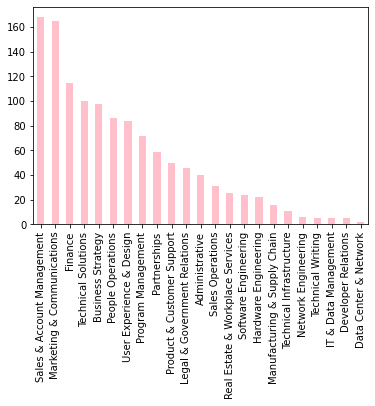

In [25]:
data_job.plot(kind= 'bar',color = 'pink')

In [27]:
# list of unique countries in the data
data['Location'].unique()

array(['Singapore', 'Shanghai, China', 'New York, NY, United States',
       'Mountain View, CA, United States', 'Sunnyvale, CA, United States',
       'Dublin, Ireland', 'Xinyi District, Taiwan',
       'Seattle, WA, United States', 'Amsterdam, Netherlands',
       'Frankfurt, Germany', 'Zürich, Switzerland',
       'London, United Kingdom', 'München, Germany', 'Berlin, Germany',
       'Hamburg, Germany', 'San Francisco, CA, United States',
       'Milan, Italy', 'Warszawa, Poland', 'Irvine, CA, United States',
       'Paris, France', 'Kirkland, WA, United States',
       'Cambridge, MA, United States', 'Sydney, Australia',
       'Waterloo, ON, Canada', 'Gurugram, India',
       'Dubai - United Arab Emirates', 'Pittsburgh, PA, United States',
       'Chicago, IL, United States', 'Bucharest, Romania',
       'Stockholm, Sweden', 'Tokyo, Japan', 'Hyderabad, India',
       'Seoul, South Korea', 'Perth, Australia', 'Taipei, Taiwan',
       'San Bruno, CA, United States', 'Beijing, China

In [36]:
# number of unique countries in the data
data['Location'].nunique()

91

In [28]:
# list of countries in the data
data['Location'].tolist()

['Singapore',
 'Shanghai, China',
 'New York, NY, United States',
 'Mountain View, CA, United States',
 'Sunnyvale, CA, United States',
 'Dublin, Ireland',
 'Mountain View, CA, United States',
 'Sunnyvale, CA, United States',
 'Xinyi District, Taiwan',
 'New York, NY, United States',
 'Mountain View, CA, United States',
 'Seattle, WA, United States',
 'Dublin, Ireland',
 'New York, NY, United States',
 'Amsterdam, Netherlands',
 'Frankfurt, Germany',
 'Dublin, Ireland',
 'Xinyi District, Taiwan',
 'Sunnyvale, CA, United States',
 'Zürich, Switzerland',
 'London, United Kingdom',
 'London, United Kingdom',
 'Sunnyvale, CA, United States',
 'Sunnyvale, CA, United States',
 'München, Germany',
 'Zürich, Switzerland',
 'Sunnyvale, CA, United States',
 'Berlin, Germany',
 'Singapore',
 'New York, NY, United States',
 'Hamburg, Germany',
 'San Francisco, CA, United States',
 'Mountain View, CA, United States',
 'Dublin, Ireland',
 'Milan, Italy',
 'Shanghai, China',
 'Mountain View, CA, Unit

In [29]:
# number of job qualification
data['Minimum Qualifications'].nunique()

806

In [35]:
data7 = data.groupby('Title')['Category'].value_counts()
data7.head()

Title                                                         Category                  
APAC Accounting Lead, Non-Ads Products                        Finance                       1
APAC Manager, Employment Tax                                  Finance                       1
APAC SMB Account Manager, Google Cloud (Mandarin, Cantonese)  Sales & Account Management    1
AR and VR Writer                                              Marketing & Communications    1
ASIC Physical Design Engineering Tech Lead & Manager          Hardware Engineering          1
Name: Category, dtype: int64